In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
input_size = 28*28         #Number of input neurons (image pixels)
hidden_size = 400          #Number of hidden neurons
out_size = 10              #Number of classes (0-9) 
epochs = 10                #How many times we pass our entire dataset into our network 
batch_size = 100           #Input size of the data during one iteration 
learning_rate = 0.003      #How fast we are learning

In [3]:
train_dataset = datasets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = datasets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

    28*28 - input neurons
    400 - hidden neurons
    10 - output neurons


In [5]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(Net, self).__init__()                    
        self.fc1 = nn.Linear(input_size, hidden_size)       #First Layer                           
        self.fc2 = nn.Linear(hidden_size, hidden_size)      #Second Layer Activation
        self.fc3 = nn.Linear(hidden_size, out_size)
        self.relu = nn.ReLU()
        self.init_weights()
        
    def init_weights(self):
        nn.init.kaiming_normal_(self.fc1.weight)
        nn.init.kaiming_normal_(self.fc2.weight)

    def forward(self, x):                          
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [6]:
CUDA = torch.cuda.is_available()

if CUDA:
    print("CUDA")
else:
    print("No CUDA :(")

CUDA


In [7]:
#Create an object of the class, which represents our network 
net = Net(input_size, hidden_size, out_size)

if CUDA:
    net = net.cuda()
    
#The loss function. The Cross Entropy loss comes along with Softmax. Therefore, no need to specify Softmax as well
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [8]:
#Train the network
loss_values = []
accuracy_values = []

for epoch in range(epochs):
    correct_train = 0
    running_loss = 0
    for i, (images, labels) in enumerate(train_loader):   
        images = images.view(-1, 28*28)    
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()
            
        outputs = net(images)       
        _, predicted = torch.max(outputs.data, 1)                                              
        correct_train += (predicted == labels).sum() 
        loss = criterion(outputs, labels)                 
        running_loss += loss.item()
        optimizer.zero_grad() 
        loss.backward()                                   
        optimizer.step()                                  
    
    loss_values.append(running_loss/len(train_loader))
    accuracy_values.append(100*correct_train.double()/len(train_dataset))

    print('Epoch [{}/{}], Training Loss: {:.3f}, Training Accuracy: {:.3f}%'.format(epoch+1, epochs, loss_values[-1], accuracy_values[-1]))

print("DONE TRAINING!")

Epoch [1/10], Training Loss: 0.198, Training Accuracy: 93.888%
Epoch [2/10], Training Loss: 0.088, Training Accuracy: 97.263%
Epoch [3/10], Training Loss: 0.065, Training Accuracy: 98.050%
Epoch [4/10], Training Loss: 0.050, Training Accuracy: 98.422%
Epoch [5/10], Training Loss: 0.043, Training Accuracy: 98.703%
Epoch [6/10], Training Loss: 0.037, Training Accuracy: 98.845%
Epoch [7/10], Training Loss: 0.038, Training Accuracy: 98.848%
Epoch [8/10], Training Loss: 0.032, Training Accuracy: 99.010%
Epoch [9/10], Training Loss: 0.031, Training Accuracy: 99.132%
Epoch [10/10], Training Loss: 0.027, Training Accuracy: 99.198%
DONE TRAINING!


Accuracy of the network on the 10000 test images: 97.41 %


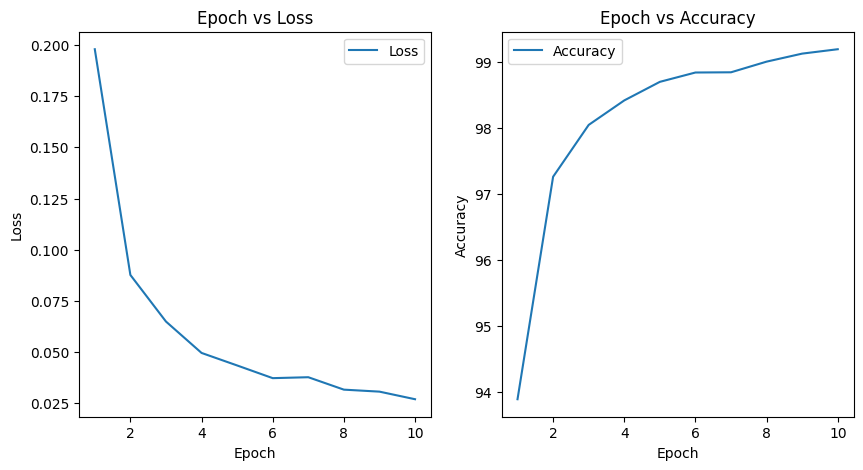

In [9]:
with torch.no_grad():
    correct = 0
    for images, labels in test_loader:
        if CUDA:
            images = images.cuda()
            labels = labels.cuda()
        images = images.view(-1, 28*28)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / len(test_dataset)
    print('Accuracy of the network on the 10000 test images: {} %'.format(accuracy))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), loss_values, label='Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Конвертуємо accuracy_values в масив NumPy після передачі на CPU
accuracy_values_numpy = [value.cpu().numpy() for value in accuracy_values]
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracy_values_numpy, label='Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

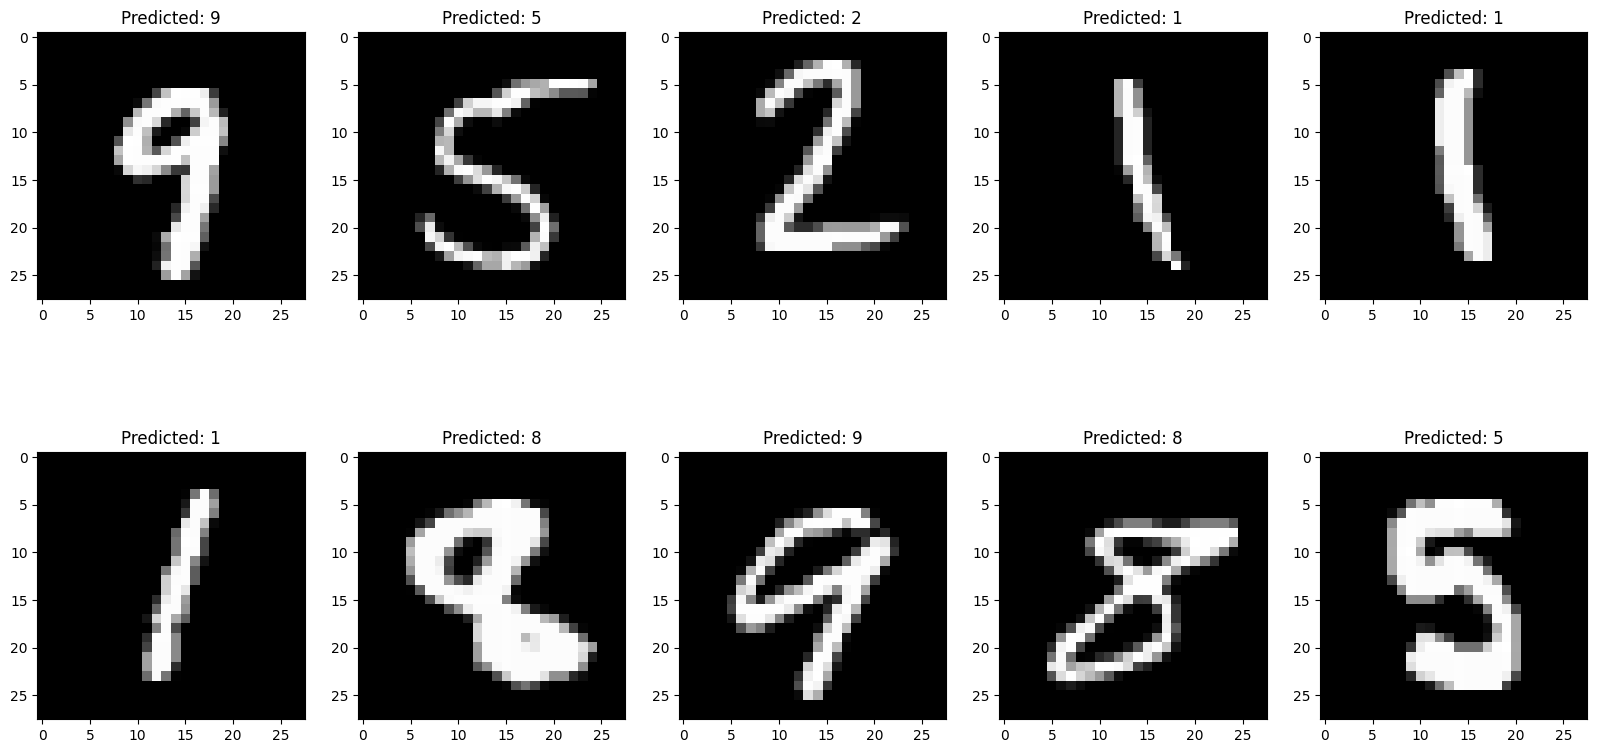

In [10]:
with torch.no_grad():
    plt.figure(figsize=(20, 10))
    for i in range(10):
        random_index = random.randint(0, len(test_dataset) - 1)
        image, label = test_dataset[random_index]
        if CUDA:
            image = image.cuda()
        output = net(image.view(-1, 28*28))
        _, predicted = torch.max(output.data, 1)
        plt.subplot(2, 5, i + 1)
        plt.imshow(image.cpu().numpy().squeeze(), cmap='gray')
        plt.title('Predicted: {}'.format(predicted.item()))
    plt.show()